   Year  No of Accidents  Accidents at Track  Accidents in Station Limits
0  2016               37                  25                           12
1  2017               15                   6                            9
2  2018               18                   8                           10
3  2019               25                  14                           11
4  2020               19                  14                            5
Year                           0
No of Accidents                0
Accidents at Track             0
Accidents in Station Limits    0
dtype: int64

Model Summary for Accidents at Track:
                 Generalized Linear Model Regression Results                  
Dep. Variable:     Accidents at Track   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:          

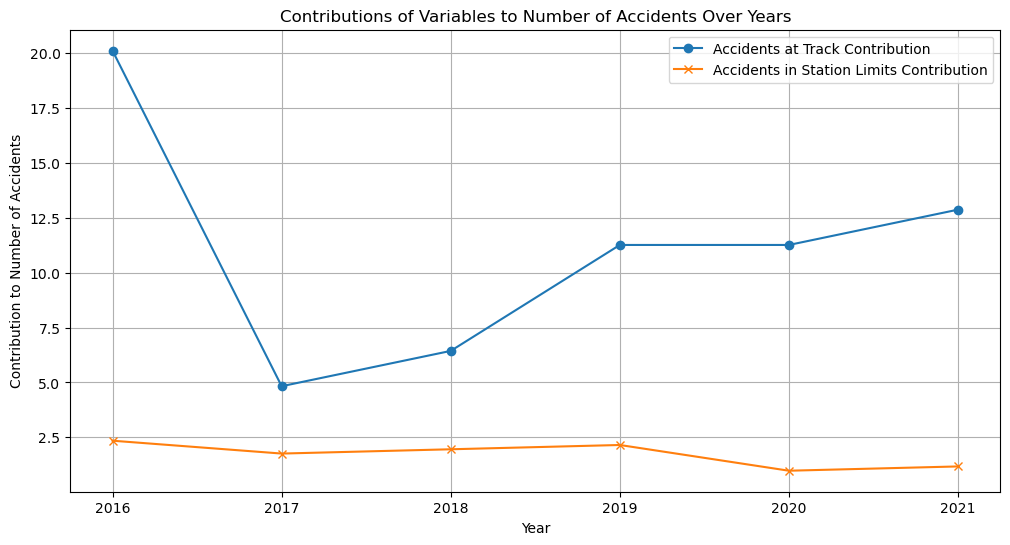

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'combined.xlsx'
sheet_name = 'Location of Accidents'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Inspect the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Data cleaning (if necessary)
df = df.fillna(method='ffill')

# Define the independent (predictor) and dependent (response) variables
X = df[['No of Accidents']]
y = df[['Accidents at Track', 'Accidents in Station Limits']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit a Normal GLM model for each dependent variable
results = {}
for column in y.columns:
    model = sm.GLM(y[column], X, family=sm.families.Gaussian()).fit()
    results[column] = model
    print(f"\nModel Summary for {column}:")
    print(model.summary())

# Function to save summary to file
def save_summary_to_file(model_name, summary, deviance, aic, pseudo_r_squared, file_name='glm_summary.txt'):
    with open(file_name, 'a') as f:
        f.write(f"\nModel Summary for {model_name}:\n")
        f.write(str(summary))
        f.write(f"Deviance: {deviance}\n")
        f.write(f"AIC: {aic}\n")
        f.write(f"Pseudo R-squared (McFadden): {pseudo_r_squared}\n")
        f.write("\n")

# Save the summaries
for column, result in results.items():
    model_name = f"{column} Prediction"
    summary = result.summary()
    deviance = result.deviance
    aic = result.aic
    null_deviance = result.null_deviance
    pseudo_r_squared = 1 - (deviance / null_deviance)
    save_summary_to_file(model_name, summary, deviance, aic, pseudo_r_squared)

# Print the DataFrame
print("\nDataFrame:")
print(df)

# Plotting contributions of each variable
plt.figure(figsize=(12, 6))

# Accidents at Track
plt.plot(df['Year'], df['Accidents at Track'] * results['Accidents at Track'].params['No of Accidents'], label='Accidents at Track Contribution', marker='o')

# Accidents in Station Limits
plt.plot(df['Year'], df['Accidents in Station Limits'] * results['Accidents in Station Limits'].params['No of Accidents'], label='Accidents in Station Limits Contribution', marker='x')

plt.xlabel('Year')
plt.ylabel('Contribution to Number of Accidents')
plt.title('Contributions of Variables to Number of Accidents Over Years')
plt.legend()
plt.grid(True)
plt.savefig('contributions_to_accidents_location.png')
plt.show()


   Year  No of accidents  Derailments  Collisions  Collisions at LC  \
0  2016               37           15           9                11   
1  2017               15           10           1                 4   
2  2018               18           13           2                 3   
3  2019               25           14           2                 8   
4  2020               19            8           4                 7   
5  2021               22           14           1                 5   

   Fire Accidents  Overshooting   
0               1              1  
1               0              0  
2               0              0  
3               1              0  
4               0              0  
5               1              1  

Model Summary for Derailments Prediction:
                 Generalized Linear Model Regression Results                  
Dep. Variable:            Derailments   No. Observations:                    6
Model:                            GLM   Df Residuals:   

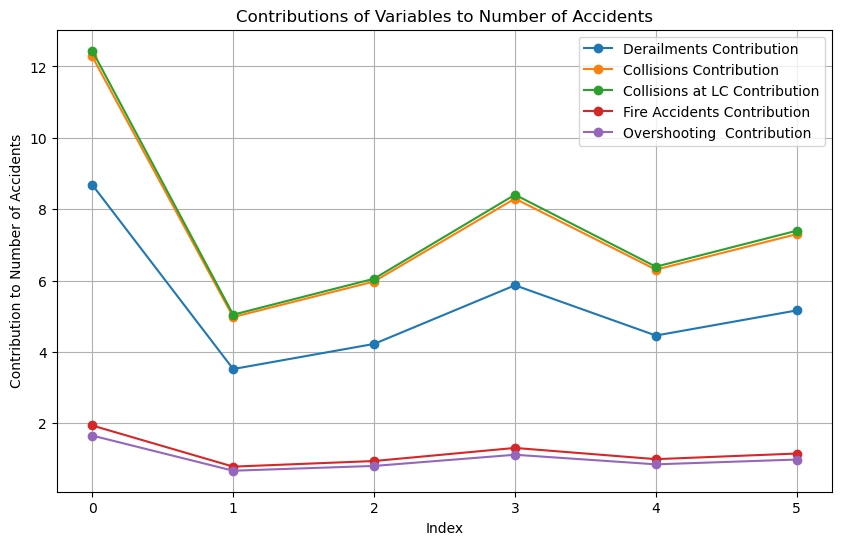

In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load and prepare the data
file_path = 'combined.xlsx'
sheet_name = 'Accident Types'
df = pd.read_excel(file_path, sheet_name=sheet_name)
df = df.fillna(method='ffill')

# Print the DataFrame
print(df)

# Define the independent (predictor) and dependent (response) variables
X = df['No of accidents']
y = df[['Derailments', 'Collisions', 'Collisions at LC', 'Fire Accidents', 'Overshooting ']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model for each dependent variable
models = {}
for col in y.columns:
    glm_normal = sm.GLM(y[col], X, family=sm.families.Gaussian(link=sm.families.links.identity()))
    glm_normal_results = glm_normal.fit()
    models[col] = glm_normal_results

    # Print the summary
    print(f"\nModel Summary for {col} Prediction:")
    print(glm_normal_results.summary())

# Plotting contributions of each variable
plt.figure(figsize=(10, 6))

# Plot each variable's contribution
for col in y.columns:
    plt.plot(df.index, df['No of accidents'] * models[col].params['No of accidents'], label=f'{col} Contribution', marker='o')

plt.xlabel('Index')
plt.ylabel('Contribution to Number of Accidents')
plt.title('Contributions of Variables to Number of Accidents')
plt.legend()
plt.grid(True)
plt.savefig('contributions_to_accidents.png')
plt.show()


DataFrame:
   Year  No_of_Accidents  Main_Line  Branch_Line
0  2016               37         25           12
1  2017               15          8            7
2  2018               18          8           10
3  2019               25         14           11
4  2020               19         14            5
5  2021               22         13            9

Model Summary for Main Line Accidents Prediction:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Main_Line   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          4.1367
Method:                          IRLS   Log-Likelihood:                -11.557
Date:                Tue, 06 Aug 2024   Deviance:                       16.547
Time:                        11:19:01   Pe

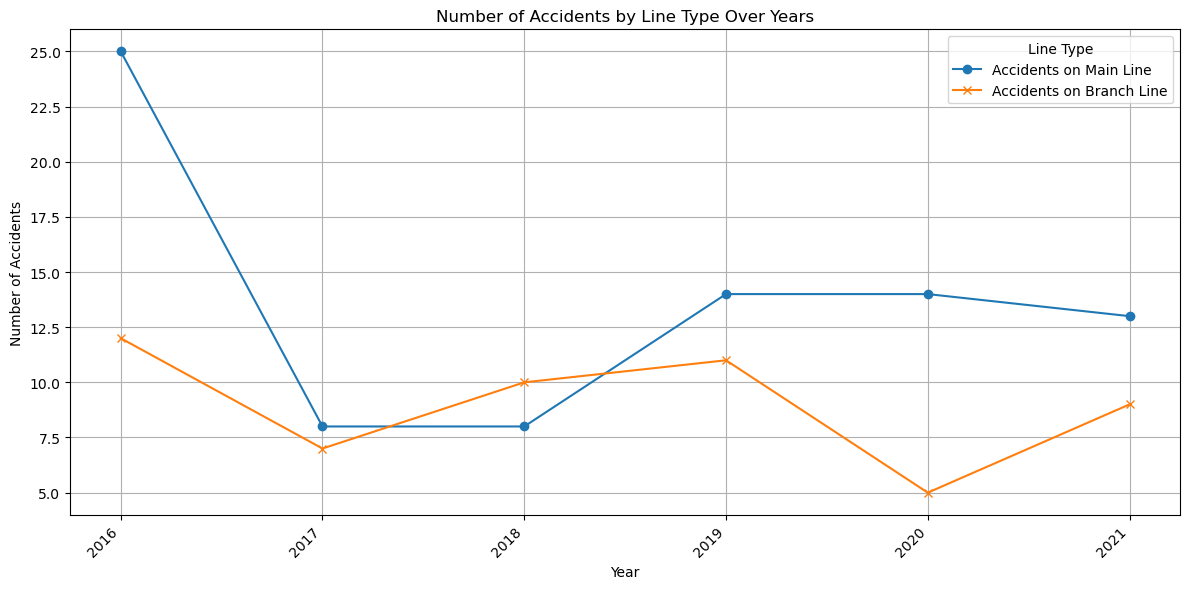

In [8]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'combined.xlsx'
sheet_name = 'Type of Line'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Print the DataFrame
print("DataFrame:")
print(df)

# Define the dependent (response) variable and independent (predictor) variables
X = df[['No_of_Accidents']]
y_main = df['Main_Line']
y_branch = df['Branch_Line']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the GLM with Gaussian family
glm_gaussian_main = sm.GLM(y_main, X, family=sm.families.Gaussian()).fit()
glm_gaussian_branch = sm.GLM(y_branch, X, family=sm.families.Gaussian()).fit()

# Function to save summary to file and print to console
def save_and_print_summary(model_name, model):
    summary_str = f"\nModel Summary for {model_name}:\n{model.summary()}\n"
    deviance = model.deviance
    aic = model.aic
    pseudo_r_squared = 1 - (model.deviance / model.null_deviance)
    
    # Print the summary
    print(summary_str)
    print(f"Deviance: {deviance}")
    print(f"AIC: {aic}")
    print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")
    
    # Save the summary to a file
    with open('glm_summary.txt', 'a') as f:
        f.write(summary_str)
        f.write(f"Deviance: {deviance}\n")
        f.write(f"AIC: {aic}\n")
        f.write(f"Pseudo R-squared (McFadden): {pseudo_r_squared}\n")
        f.write("\n")

# Save and print the summaries
save_and_print_summary('Main Line Accidents Prediction', glm_gaussian_main)
save_and_print_summary('Branch Line Accidents Prediction', glm_gaussian_branch)

# Plotting the actual values for each line type over years
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Main_Line'], label='Accidents on Main Line', marker='o')
plt.plot(df['Year'], df['Branch_Line'], label='Accidents on Branch Line', marker='x')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Line Type Over Years')
plt.legend(title='Line Type')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust plot to fit labels
plt.savefig('accidents_by_line_and_year.png')
plt.show()


DataFrame:
   Year  No_of_Accidents  Passenager_train  Goods_Train  Other_Train
0  2016               37                28            8            1
1  2017               15                10            5            0
2  2018               18                 8            8            2
3  2019               25                17            8            0
4  2020               19                13            6            0
5  2021               25                10           15            0
GLM Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        2
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.891
Date:        

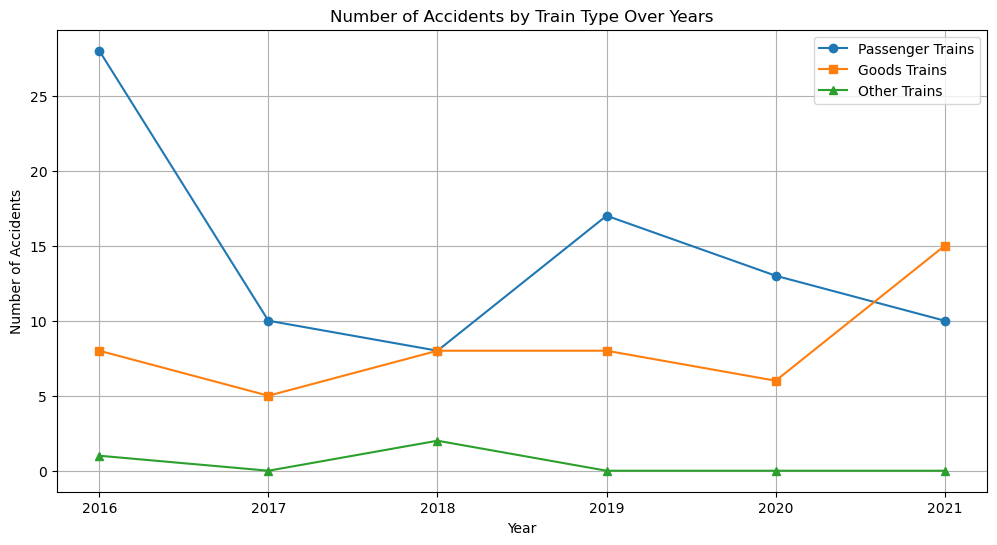

In [14]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'combined.xlsx'
sheet_name = 'Types of Train'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Print the DataFrame
print("DataFrame:")
print(df)

# Prepare data for GLM
X = df[['Passenager_train', 'Goods_Train', 'Other_Train']]
y = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit the GLM model with Poisson family
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary
print("GLM Model Summary:")
print(results.summary())

# Print additional metrics
print(f"Deviance: {results.deviance}")
print(f"AIC: {results.aic}")

# Calculate and print Pseudo R-squared (McFadden)
null_model = sm.GLM(y, sm.add_constant(pd.DataFrame({'const': [1] * len(y)})), family=sm.families.Poisson()).fit()
null_deviance = null_model.deviance
pseudo_r_squared = 1 - (results.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")

# Function to save summary to file
def save_summary_to_file(model_name, summary, deviance, aic, pseudo_r_squared, file_name='glm_summary.txt'):
    with open(file_name, 'a') as f:
        f.write(f"\nModel Summary for {model_name}:\n")
        f.write(str(summary))
        f.write(f"Deviance: {deviance}\n")
        f.write(f"AIC: {aic}\n")
        f.write(f"Pseudo R-squared (McFadden): {pseudo_r_squared}\n")
        f.write("\n")

# Save the current summary
model_name = 'Train Types Accident Prediction'
summary = results.summary()
deviance = results.deviance
aic = results.aic
save_summary_to_file(model_name, summary, deviance, aic, pseudo_r_squared)

# Plotting the number of accidents by train type over years
plt.figure(figsize=(12, 6))

# Plot number of accidents for Passenger trains
plt.plot(df['Year'], df['Passenager_train'], marker='o', label='Passenger Trains')

# Plot number of accidents for Goods trains
plt.plot(df['Year'], df['Goods_Train'], marker='s', label='Goods Trains')

# Plot number of accidents for Other trains
plt.plot(df['Year'], df['Other_Train'], marker='^', label='Other Trains')

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Train Type Over Years')
plt.legend()
plt.grid(True)
plt.xticks(df['Year'])  # Ensure all years are shown on the x-axis
plt.savefig('accidents_by_train_type_over_years.png')
plt.show()


DataFrame:
   Year  No_of_Accidents  No_Damge_to_PR  Cause_Damge_to_PR  Cost_of_Damage
0  2016               37              22                 15         3951000
1  2017               15               9                  6          742000
2  2018               18              10                  8        11837000
3  2019               25              14                 11         4168000
4  2020               19              12                  7         6681000
5  2021               22               7                 15        22001000

Model Cost vs Accidents  Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:         Cost_of_Damage   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                    

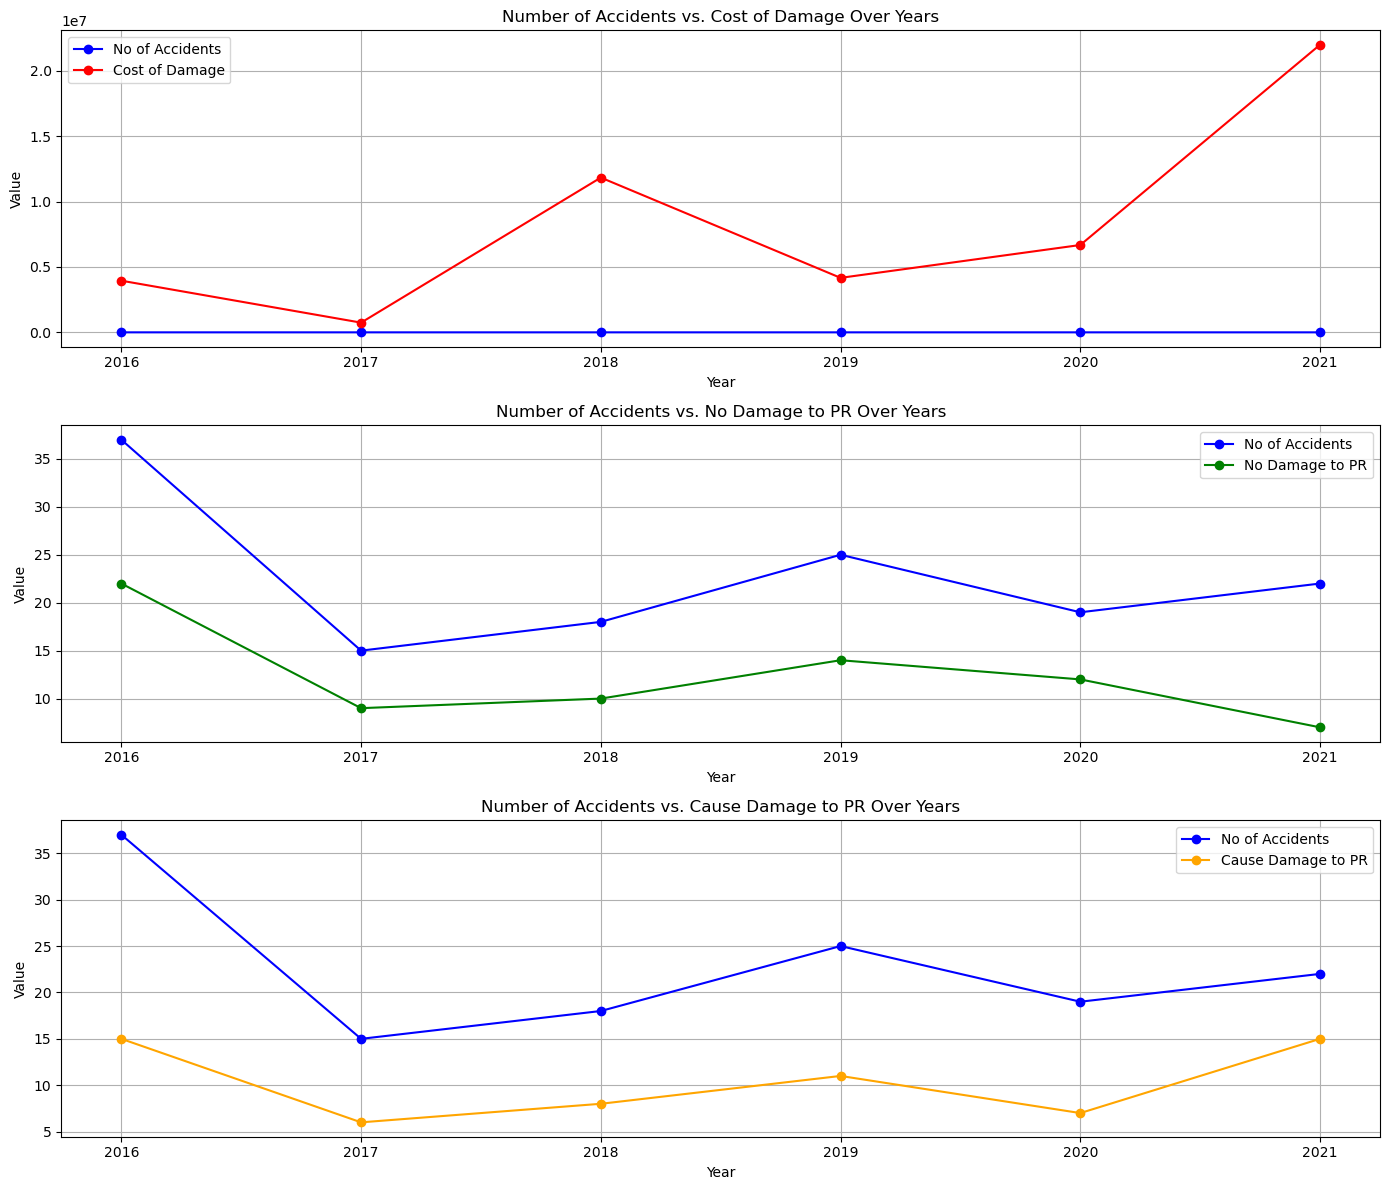

In [18]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'combined.xlsx'
sheet_name = 'Cost of Damage'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Print the DataFrame
print("DataFrame:")
print(df)

# Define and fit Model 1: No_of_Accidents vs. Cost_of_Damage
X1 = df[['No_of_Accidents']]
y1 = df['Cost_of_Damage']
X1 = sm.add_constant(X1)
model1 = sm.GLM(y1, X1, family=sm.families.Poisson())
results1 = model1.fit()

# Define and fit Model 2: No_of_Accidents vs. No_Damge_to_PR
X2 = df[['No_of_Accidents']]
y2 = df['No_Damge_to_PR']
X2 = sm.add_constant(X2)
model2 = sm.GLM(y2, X2, family=sm.families.Poisson())
results2 = model2.fit()

# Define and fit Model 3: No_of_Accidents vs. Cause_Damge_to_PR
X3 = df[['No_of_Accidents']]
y3 = df['Cause_Damge_to_PR']
X3 = sm.add_constant(X3)
model3 = sm.GLM(y3, X3, family=sm.families.Poisson())
results3 = model3.fit()

# Function to extract and format model metrics
def print_metrics(results):
    deviance = results.deviance
    aic = results.aic
    pseudo_r_squared = 1 - (deviance / results.null_deviance)
    return f"Deviance: {deviance}\nAIC: {aic}\nPseudo R-squared (McFadden): {pseudo_r_squared}\n"

# Function to save summary to file
def save_summary_to_file(model_name, summary, metrics, file_name='glm_summary.txt'):
    with open(file_name, 'a') as f:
        f.write(f"\nModel Summary for {model_name}:\n")
        f.write(str(summary))
        f.write(f"\n{metrics}\n")

# Save summaries and metrics
model1_name = 'Model 1: No of Accidents vs. Cost of Damage'
model2_name = 'Model 2: No of Accidents vs. No Damage to PR'
model3_name = 'Model 3: No of Accidents vs. Cause Damage to PR'

metrics1 = print_metrics(results1)
metrics2 = print_metrics(results2)
metrics3 = print_metrics(results3)

save_summary_to_file(model1_name, results1.summary(), metrics1)
save_summary_to_file(model2_name, results2.summary(), metrics2)
save_summary_to_file(model3_name, results3.summary(), metrics3)

# Print model summaries and metrics
print(f"\nModel Cost vs Accidents  Summary:\n{results1.summary()}\n{metrics1}")
print(f"\nModel Damage to PR vs Accidents Summary:\n{results2.summary()}\n{metrics2}")
print(f"\nModel No Damage to PR vs Accidents Summary:\n{results3.summary()}\n{metrics3}")

# Plotting the graphs

# Plot 1: Number of Accidents and Cost of Damage over Years
plt.figure(figsize=(14, 12))

# Number of Accidents vs. Cost of Damage
plt.subplot(3, 1, 1)
plt.plot(df['Year'], df['No_of_Accidents'], marker='o', label='No of Accidents', color='blue')
plt.plot(df['Year'], df['Cost_of_Damage'], marker='o', label='Cost of Damage', color='red')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Number of Accidents vs. Cost of Damage Over Years')
plt.grid(True)
plt.legend()

# Number of Accidents vs. No Damage to PR
plt.subplot(3, 1, 2)
plt.plot(df['Year'], df['No_of_Accidents'], marker='o', label='No of Accidents', color='blue')
plt.plot(df['Year'], df['No_Damge_to_PR'], marker='o', label='No Damage to PR', color='green')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Number of Accidents vs. No Damage to PR Over Years')
plt.grid(True)
plt.legend()

# Number of Accidents vs. Cause Damage to PR
plt.subplot(3, 1, 3)
plt.plot(df['Year'], df['No_of_Accidents'], marker='o', label='No of Accidents', color='blue')
plt.plot(df['Year'], df['Cause_Damge_to_PR'], marker='o', label='Cause Damage to PR', color='orange')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Number of Accidents vs. Cause Damage to PR Over Years')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('cost_of_damage_analysis.png')
plt.show()


   Sr_No  Year  No_of_Accidents  No_Casualties  Casualties  No_of_Deaths  \
0      1  2016               37             30           7            12   
1      2  2017               15             10           5             6   
2      3  2018               18             16           2             1   
3      4  2019               25             16           9             5   
4      5  2020               19             14           5             5   
5      6  2021               22             18           4             4   

   No_of_Injuries  
0              26  
1               9  
2               0  
3              10  
4               2  
5               6  

Model Summary for Casualties vs. Number of Accidents:
                 Generalized Linear Model Regression Results                  
Dep. Variable:             Casualties   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                 Poiss

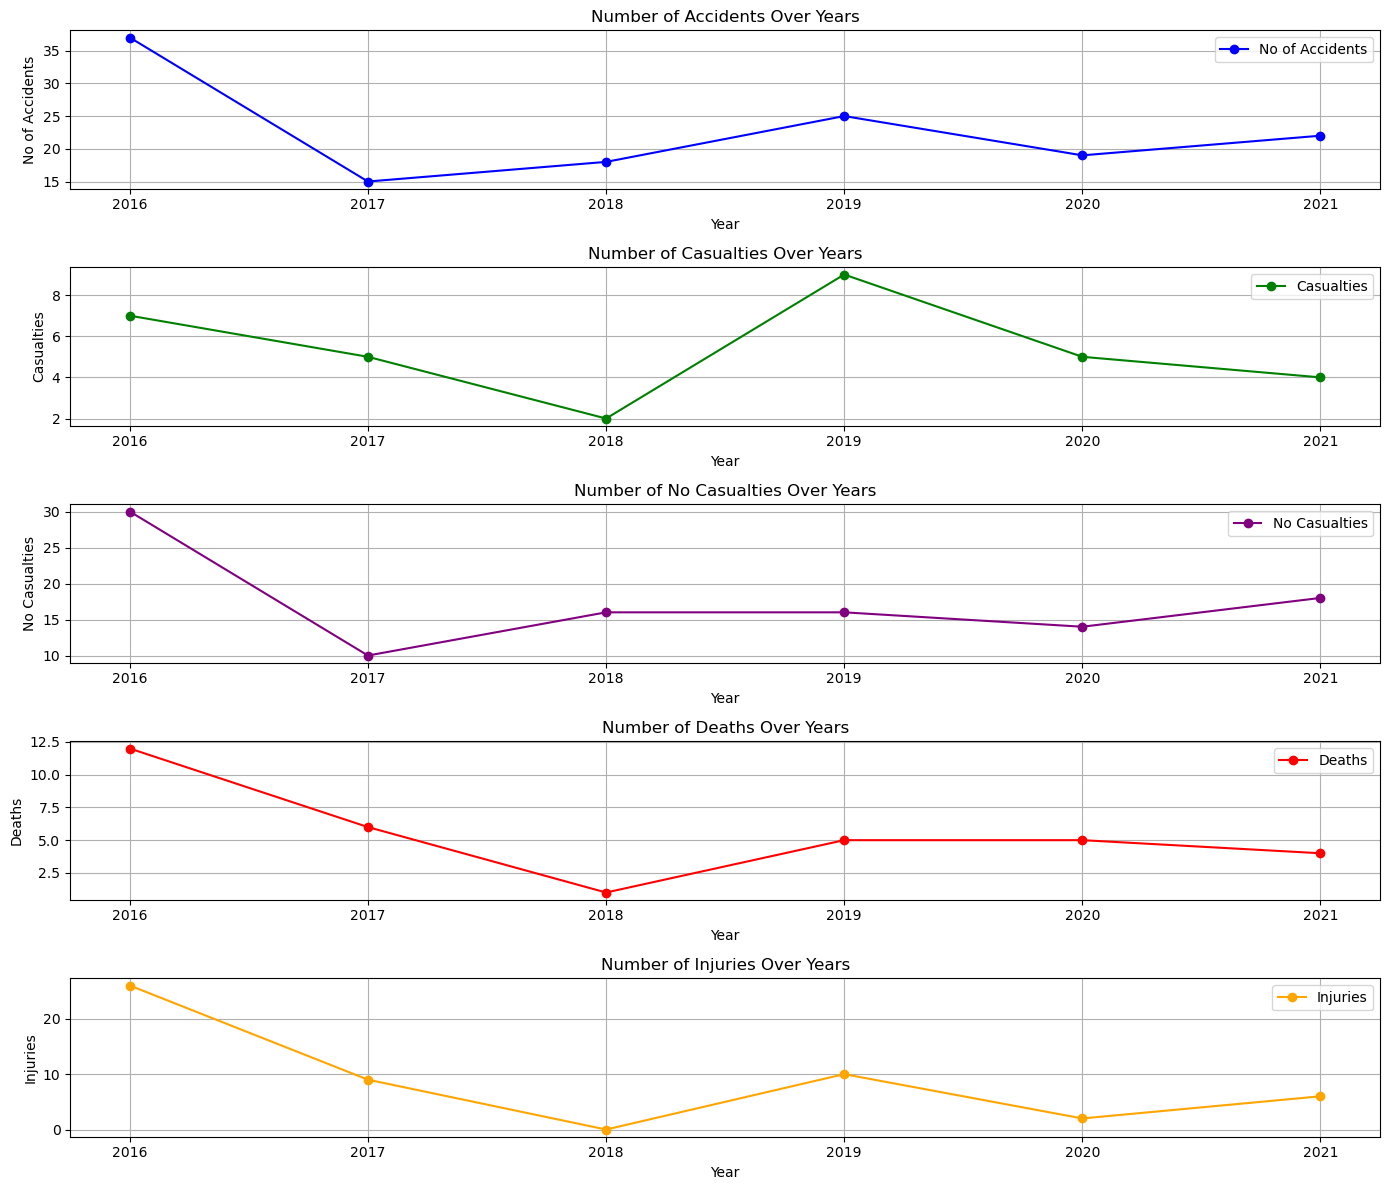

In [20]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'combined.xlsx'
sheet_name = 'Severity'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Rename columns to remove extra spaces and make them consistent
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Verify column names after renaming
print(df)
# Define the independent variable (No_of_Accidents) and dependent variables
independent_var = df['No_of_Accidents']

# List of dependent variables
dependent_vars = ['Casualties', 'No_Casualties', 'No_of_Deaths', 'No_of_Injuries']

# Prepare to save summaries
def save_summary_to_file(model_name, summary, metrics, file_name='severity_models_summary.txt'):
    with open(file_name, 'a') as f:
        f.write(f"\nModel Summary for {model_name}:\n")
        f.write(str(summary))
        f.write(f"\n{metrics}\n")

# Fit GLM models for each dependent variable
for dep_var in dependent_vars:
    X = sm.add_constant(independent_var)
    y = df[dep_var]
    
    # Fit the GLM model
    model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
    
    # Print the summary for the model
    print(f"\nModel Summary for {dep_var} vs. Number of Accidents:")
    print(model.summary())
    
    # Print additional metrics
    print(f"Deviance: {model.deviance}")
    print(f"AIC: {model.aic}")
    print(f"Log-Likelihood: {model.llf}")
    
    # Save summary to file
    metrics = f"Deviance: {model.deviance}\nAIC: {model.aic}\nLog-Likelihood: {model.llf}"
    save_summary_to_file(f"{dep_var} vs. No of Accidents", model.summary(), metrics)

# Plotting the graphs

# Plot 1: Number of Accidents, Casualties, Deaths, and Injuries over Years
plt.figure(figsize=(14, 12))

# Number of Accidents
plt.subplot(5, 1, 1)
plt.plot(df['Year'], df['No_of_Accidents'], marker='o', label='No of Accidents', color='blue')
plt.xlabel('Year')
plt.ylabel('No of Accidents')
plt.title('Number of Accidents Over Years')
plt.grid(True)
plt.legend()

# Number of Casualties
plt.subplot(5, 1, 2)
plt.plot(df['Year'], df['Casualties'], marker='o', label='Casualties', color='green')
plt.xlabel('Year')
plt.ylabel('Casualties')
plt.title('Number of Casualties Over Years')
plt.grid(True)
plt.legend()

# No Casualties
plt.subplot(5, 1, 3)
plt.plot(df['Year'], df['No_Casualties'], marker='o', label='No Casualties', color='purple')
plt.xlabel('Year')
plt.ylabel('No Casualties')
plt.title('Number of No Casualties Over Years')
plt.grid(True)
plt.legend()

# Number of Deaths
plt.subplot(5, 1, 4)
plt.plot(df['Year'], df['No_of_Deaths'], marker='o', label='Deaths', color='red')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Number of Deaths Over Years')
plt.grid(True)
plt.legend()

# Number of Injuries
plt.subplot(5, 1, 5)
plt.plot(df['Year'], df['No_of_Injuries'], marker='o', label='Injuries', color='orange')
plt.xlabel('Year')
plt.ylabel('Injuries')
plt.title('Number of Injuries Over Years')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('severity_analysis_all.png')
plt.show()



Model Summary for Seasonal Accidents:
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        1
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.859
Date:                Tue, 06 Aug 2024   Deviance:                      0.17931
Time:                        12:01:13   Pearson chi2:                    0.179
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8708
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        

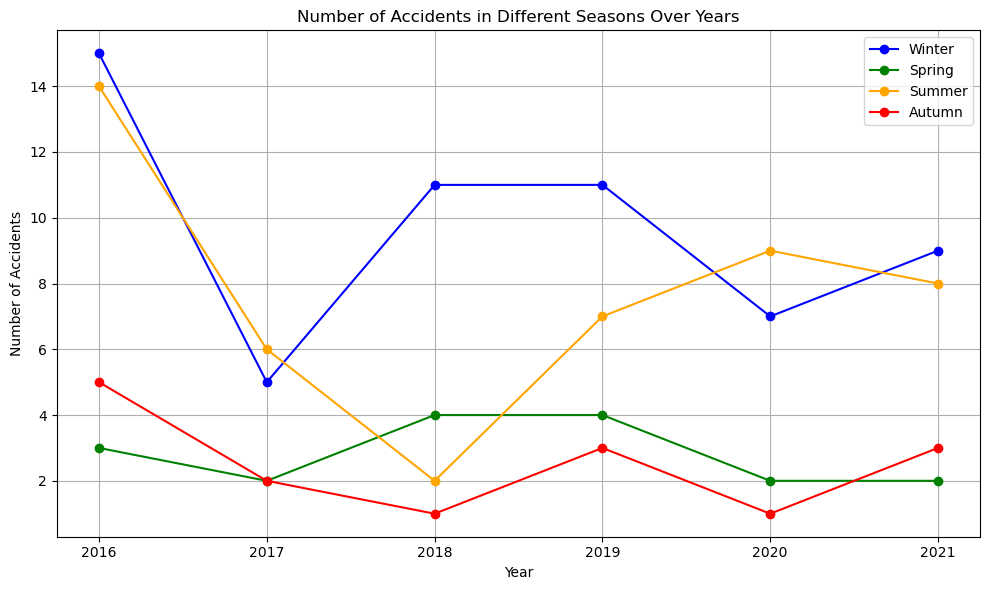

In [21]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Data
data = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021],
    'No_of_Accidents': [37, 15, 18, 25, 19, 22],
    'Winter': [15, 5, 11, 11, 7, 9],
    'Spring': [3, 2, 4, 4, 2, 2],
    'Summer': [14, 6, 2, 7, 9, 8],
    'Autumn': [5, 2, 1, 3, 1, 3]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define independent variables and dependent variable
X = df[['Winter', 'Spring', 'Summer', 'Autumn']]
y = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit GLM model
model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print the summary for the model
print("\nModel Summary for Seasonal Accidents:")
print(model.summary())

print(f"Deviance: {model.deviance}")
print(f"AIC: {model.aic}")
print(f"Log-Likelihood: {model.llf}")

# Plotting the graphs
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Winter'], marker='o', label='Winter', color='blue')
plt.plot(df['Year'], df['Spring'], marker='o', label='Spring', color='green')
plt.plot(df['Year'], df['Summer'], marker='o', label='Summer', color='orange')
plt.plot(df['Year'], df['Autumn'], marker='o', label='Autumn', color='red')

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents in Different Seasons Over Years')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('seasonal_accidents_over_years.png')
plt.show()


   Year  No of Accidents  Accidents at Track  Accidents in Station Limits
0  2016               37                  25                           12
1  2017               15                   6                            9
2  2018               18                   8                           10
3  2019               25                  14                           11
4  2020               19                  14                            5
Year                           0
No of Accidents                0
Accidents at Track             0
Accidents in Station Limits    0
dtype: int64

Model Summary for Accidents at Track:
                 Generalized Linear Model Regression Results                  
Dep. Variable:     Accidents at Track   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:          

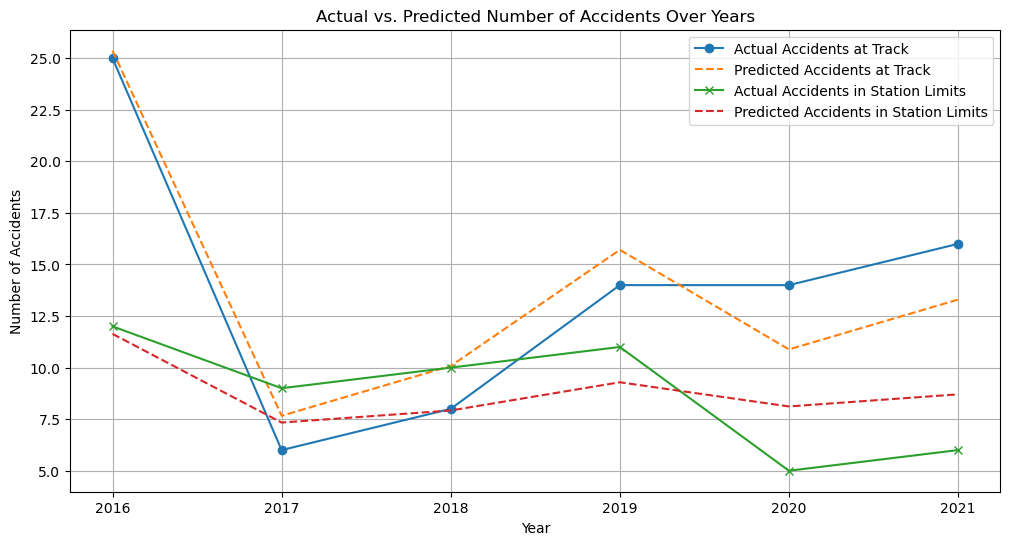

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'combined.xlsx'
sheet_name = 'Location of Accidents'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Inspect the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Data cleaning (if necessary)
df = df.fillna(method='ffill')

# Define the independent (predictor) and dependent (response) variables
X = df[['No of Accidents']]
y = df[['Accidents at Track', 'Accidents in Station Limits']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit a GLM model for each dependent variable
results = {}
for column in y.columns:
    model = sm.GLM(y[column], X, family=sm.families.Gaussian()).fit()
    results[column] = model
    print(f"\nModel Summary for {column}:")
    print(model.summary())

# Function to save summary to file
def save_summary_to_file(model_name, summary, deviance, aic, pseudo_r_squared, file_name='glm_summary.txt'):
    with open(file_name, 'a') as f:
        f.write(f"\nModel Summary for {model_name}:\n")
        f.write(str(summary))
        f.write(f"Deviance: {deviance}\n")
        f.write(f"AIC: {aic}\n")
        f.write(f"Pseudo R-squared (McFadden): {pseudo_r_squared}\n")
        f.write("\n")

# Save the summaries
for column, result in results.items():
    model_name = f"{column} Prediction"
    summary = result.summary()
    deviance = result.deviance
    aic = result.aic
    null_deviance = result.null_deviance
    pseudo_r_squared = 1 - (deviance / null_deviance)
    save_summary_to_file(model_name, summary, deviance, aic, pseudo_r_squared)

# Print the DataFrame
print("\nDataFrame:")
print(df)

# Predictions for new data (example)
# Define new independent variables for prediction
new_data = pd.DataFrame({
    'const': [1],  # Intercept
    'No of Accidents': [100]  # Example value for prediction
})

# Predict for each model
predictions = {}
for column, model in results.items():
    predictions[column] = model.predict(new_data)
    print(f"Predicted {column}: {predictions[column].values[0]}")

# Plotting contributions of each variable
plt.figure(figsize=(12, 6))

# Accidents at Track
plt.plot(df['Year'], df['Accidents at Track'], label='Actual Accidents at Track', marker='o')
plt.plot(df['Year'], results['Accidents at Track'].predict(X), label='Predicted Accidents at Track', linestyle='--')

# Accidents in Station Limits
plt.plot(df['Year'], df['Accidents in Station Limits'], label='Actual Accidents in Station Limits', marker='x')
plt.plot(df['Year'], results['Accidents in Station Limits'].predict(X), label='Predicted Accidents in Station Limits', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Actual vs. Predicted Number of Accidents Over Years')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_predicted_accidents.png')
plt.show()
